In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from queue import PriorityQueue


R, L, U, D = 1.1, 0.1, 1.1, 0.1 #R if i < i + 1, U if j < j + 1
N = 60

T = 100 #time

In [2]:
def expRV(K):
  return -1/K * np.log(np.random.uniform(0, 1))
  #return np.random.exponential(1/K)

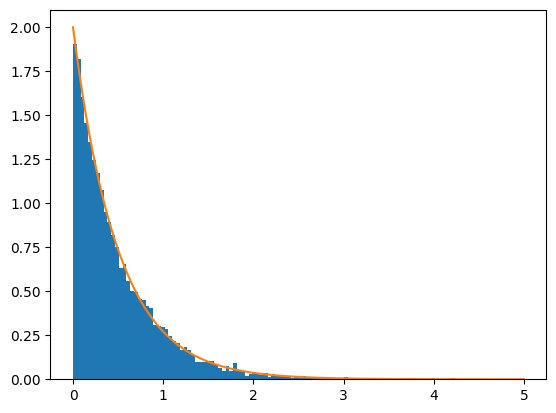

In [3]:
K = 2
vals = np.zeros(10000)
xVals = np.linspace(0, 5, 3100)

for i in range(10000):
  vals[i] = expRV(K)

plt.hist(vals, bins = 100, density = True)
plt.plot(xVals, K * np.exp(-1 * K * xVals))

plt.show()



In [4]:
def simulate():
  pq = PriorityQueue()  #edge, last move number
  lastMoved = [[[0 for k in range(2)] for j in range(2 * N + 1)] for i in range(2 * N + 1)]
  moveNum = 0
  timeElapsed = 0
  posNN = [[N, N]]
  times = [0]
  count = 0
  grid = [[[0 for k in range(2)] for j in range(2 * N + 1)] for i in range(2 * N + 1)]

  for i in range(2 * N + 1):
    for j in range (2 * N + 1):
      grid[i][j][0] = i
      grid[i][j][1] = j


  #horizantal edges
  for i in range(2 * N):
    for j in range(2 * N + 1):
      pq.put((expRV(R), i, j, True, moveNum))
  
  for i in range (2 * N + 1):
    for j in range(2 * N):
      pq.put((expRV(U), i, j, False, moveNum))



  while (timeElapsed < T):
    (time, posX, posY, isHorizantal, EdgeMove) = pq.get()

    # print("edgemove: ", EdgeMove)
    # print("lastMove: ", lastMoved[posX][posY][isHorizantal])


    while (EdgeMove != lastMoved[posX][posY][isHorizantal]):
        (time, posX, posY, isHorizantal, EdgeMove) = pq.get()

    
    timeElapsed = time

    #print(timeElapsed)

    #record change
    if (grid[posX][posY][0] == N and grid[posX][posY][1] == N and isHorizantal):
      posNN.append([posNN[-1][0] + 1, posNN[-1][1]])
      times.append(timeElapsed)
    elif (grid[posX][posY][0] == N and grid[posX][posY][1] == N and (not isHorizantal)):
      posNN.append([posNN[-1][0], posNN[-1][1] + 1])
      times.append(timeElapsed)
    elif (posX < 2 * N and grid[posX + 1][posY][0] == N and grid[posX + 1][posY][1] == N and (isHorizantal)):
      posNN.append([posNN[-1][0] - 1, posNN[-1][1]])
      times.append(timeElapsed)
    elif (posY < 2 * N and grid[posX][posY + 1][0] == N and grid[posX][posY + 1][1] == N and (not isHorizantal)):
      posNN.append([posNN[-1][0], posNN[-1][1] - 1])
      times.append(timeElapsed)


    #switch on the grid
    if (posX < 2*N and isHorizantal):
      temp = grid[posX][posY]
      grid[posX][posY] = grid[posX + 1][posY]
      grid[posX + 1][posY] = temp
    if (posY < 2*N and (not isHorizantal)):
      temp = grid[posX][posY]
      grid[posX][posY] = grid[posX][posY + 1]
      grid[posX][posY + 1] = temp


    moveNum += 1
    #fixing waitingTimes
    if (posX > 0):
      tempTime = time
      tempTime += expRV(R) if grid[posX-1][posY][0] < grid[posX][posY][0] else expRV(L)
      pq.put((tempTime, posX - 1, posY, True, moveNum))
      lastMoved[posX - 1][posY][isHorizantal] = moveNum
    if (posY > 0):
      tempTime = time
      tempTime += expRV(U) if grid[posX][posY-1][1] < grid[posX][posY][1] else expRV(D)
      pq.put((tempTime, posX, posY - 1, False, moveNum))
      lastMoved[posX][posY-1][isHorizantal] = moveNum
    if (posX < 2 * N):
      tempTime = time
      tempTime += expRV(R) if grid[posX][posY][0] < grid[posX + 1][posY][0] else expRV(L)
      pq.put((tempTime, posX, posY, True, moveNum))
      lastMoved[posX][posY][isHorizantal] = moveNum
    if (posY < 2 * N):
      tempTime = time
      tempTime += expRV(U) if grid[posX][posY][1] < grid[posX][posY + 1][1] else expRV(D)
      pq.put((tempTime, posX, posY, False, moveNum))
      lastMoved[posX][posY][isHorizantal] = moveNum


    if (isHorizantal):
      if (posX + 1 < 2*N): #horiznatl fix
        tempTime = time
        tempTime += expRV(R) if grid[posX + 1][posY][0] < grid[posX + 2][posY][0] else expRV(L)
        pq.put((tempTime, posX + 1, posY, True, moveNum))
        lastMoved[posX + 1][posY][isHorizantal] = moveNum
      if (posY > 0):
        tempTime = time
        tempTime += expRV(U) if grid[posX + 1][posY - 1][1] < grid[posX + 1][posY][1] else expRV(D)
        pq.put((tempTime, posX + 1, posY - 1, False, moveNum))
        lastMoved[posX + 1][posY - 1][isHorizantal] = moveNum
      if (posY < 2 * N):
          tempTime = time
          tempTime += expRV(U) if grid[posX + 1][posY][1] < grid[posX + 1][posY + 1][1] else expRV(D)
          pq.put((tempTime, posX + 1, posY, False, moveNum))
          lastMoved[posX + 1][posY][isHorizantal] = moveNum
    else:
      if (posY + 1 < 2 * N):
        tempTime = time
        tempTime += expRV(U) if grid[posX][posY + 1][1] < grid[posX][posY + 2][1] else expRV(D)
        pq.put((tempTime, posX, posY + 1, False, moveNum))
      if (posX > 0):
        tempTime = time
        tempTime += expRV(R) if grid[posX - 1][posY + 1][0] < grid[posX][posY + 1][0] else expRV(L)
        pq.put((tempTime, posX - 1, posY + 1, True, moveNum))
        lastMoved[posX - 1][posY + 1][isHorizantal] = moveNum
      if (posX < 2 * N):
        tempTime = time
        tempTime += expRV(R) if grid[posX][posY + 1][0] < grid[posX + 1][posY + 1][0] else expRV(L)
        pq.put((tempTime, posX, posY + 1, True, moveNum))
        lastMoved[posX][posY + 1][isHorizantal] = moveNum

  #print(moveNum)
  return posNN, times







In [ ]:
numPaths = 10
plt.figure()
plt.figure(figsize = (24, 36))
distances = np.zeros(numPaths)
totalMoves = np.zeros(numPaths)
xVals = np.zeros(numPaths)

posNNarr = []
timesarr = []

ax11 = plt.subplot(321)
ax12 = plt.subplot(322)
ax13 = plt.subplot(323)
ax21 = plt.subplot(324)
ax22 = plt.subplot(325)
ax23 = plt.subplot(326)


for i in range (numPaths):
  print(i)
  posNN, times = simulate()
  posNN = np.array(posNN)
  posNNarr.append(posNN)
  timesarr.append(times)

  distances[i] = np.sqrt((posNN[-1][0]-N)**2 + (posNN[-1][1] - N)** 2)
  totalMoves[i] = len(posNN)
  xVals[i] = posNN[-1][0]
  ax11.plot(posNN[:, 0], posNN[:, 1])

  slopes = np.zeros(len(posNN))

  angles = np.zeros(len(posNN))
  S1 = False
  S2 = False;
  for i in range(len(posNN)):
    #print(posNN[i])
    if (posNN[i][0] - N) == 0 and posNN[i][1] - N > 0:
      angles[i] = np.pi/2
      S1 = True
    elif (posNN[i][0] - N) == 0 and posNN[i][1] - N < 0:
      angles[i] = -np.pi/2
      S2 = True
    else:
      angles[i] = math.atan2(posNN[i][1] - N, posNN[i][0] - N)

  if (not (S1 and S2) ):
    ax23.plot(times, angles)
  #ax31.plot(times, np.where(slopes != 0, np.log(np.absolute(slopes)), 0) )

  


ax11.plot(0, 0)
ax11.plot(2 * N, 0)
ax11.plot(2 * N, 2 * N)
ax11.plot(0, 2 * N)
ax11.plot(N, N, marker='o', markersize=4, color="red")


ax12.hist(distances, bins = (int)(np.sqrt(numPaths)), density = True)
ax13.hist(xVals - N, bins = (int)(np.sqrt(numPaths)), density = True)
ax21.hist(totalMoves, bins = (int)(np.sqrt(numPaths)), density = True)
ax22.scatter(totalMoves, distances)
plt.show()

In [ ]:
for i in range(numPaths):
  posNN = posNNarr[i]
  times = timesarr[i]
  slopes = np.zeros(len(posNN))
  for i in range(len(posNN)):
    #print(posNN[i])
    if (posNN[i][0] - N) == 0:
      slopes[i] = 10
    else:
      slopes[i] = (posNN[i][1] - N)/(posNN[i][0] - N)
  plt.plot(times, slopes)
  #ax31.plot(times, np.where(slopes != 0, np.log(np.absolute(slopes)), 0) )

plt.show()